# Replicate paper

In [6]:
!pip install gensim
!pip install tensorflow
!pip install keras_preprocessing

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import nltk

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.activations import *
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
# from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Flatten, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, multiply
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing, Input
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gensim
# from keras.utils.vis_utils import plot_model

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import BatchNormalization

# from keras.layers.rnn.bidirectional import Bidirectional
from tensorflow.keras.layers import LSTM, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Sequential
import re
from PIL import Image, ImageFile
import seaborn as sns
from sklearn import metrics


from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
# from keras.layers.rnn.bidirectional import Bidirectional

In [8]:
np.random.seed(0)
adam = keras.optimizers.Adam(learning_rate=0.001) # Optimizer Adam

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

# Libraries

In [10]:
# import zipfile
# import os

# # Path to your zip file
# zip_path = "/content/drive/MyDrive/XAI_Dataset/ImageData/image1.zip"

# # Directory to extract into
# extract_to = "/content/drive/MyDrive/XAI_Dataset/ImageData/data"

# # Create the output folder if it doesn't exist
# os.makedirs(extract_to, exist_ok=True)

# # Open and extract the zip
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Extraction complete!")


# Load Dataset

In [16]:
import pandas as pd

In [17]:
outputPath =  "/content/drive/MyDrive/XAI_Dataset/Output"
word2vec_path='/content/drive/MyDrive/XAI_Dataset/Word2Vec/Am.word2vec.skipgram300.stemmed.txt'
dataset_path= '/content/drive/MyDrive/XAI_Dataset/Preprocessed_dataset.xlsx'
img_dir = "/content/drive/MyDrive/XAI_Dataset/ImageData/data/image1"

In [18]:
col_names = ['image', 'text', 'Lable']
dataset = pd.read_excel(dataset_path, header=0, names=col_names)
label_map = {'normal speech': 0, 'hate speech': 1}
dataset["Lable"] = dataset["Lable"].map(label_map)

In [19]:
# Convert any non-string values in the text column to strings
df=dataset
df['text'] = df['text'].astype(str)

# Preprocess the text by tokenizing and removing stop words
sentences = df['text'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Combine the padded sequences with the image column
X = pd.concat([df[['image']], pd.DataFrame(padded_sequences)], axis=1)
y = df['Lable']

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.10, random_state=14)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.11, random_state=42)

In [20]:
df['text'][57]

'የዘንድሮው ተኛ ተፈታኞች ውጤት ሳመጣላቸው ሲቀር መፅናኛቸው ቸገረኝ ዋናው ዩንቨርስቲ ገብቸ መውጣቴ'

In [21]:
print(df['text'][57])
print(sequences[57])
print(padded_sequences[57])

የዘንድሮው ተኛ ተፈታኞች ውጤት ሳመጣላቸው ሲቀር መፅናኛቸው ቸገረኝ ዋናው ዩንቨርስቲ ገብቸ መውጣቴ
[2383, 300, 2384, 15, 2385, 2386, 2387, 1096, 301, 420, 2388, 2389]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 2383  300 2384   15 2385 2386 2387 1096  301  420 2388 2389]


In [22]:
word_index

{'nan': 1,
 'አማራ': 2,
 'የአማራ': 3,
 'ፋኖ': 4,
 'ሲልህ': 5,
 'አመት': 6,
 'ሄደህ': 7,
 'አድስ': 8,
 'ሀይል': 9,
 'ተማሪ': 10,
 'መንገድ': 11,
 'አበባ': 12,
 'ሰላም': 13,
 'ልዩ': 14,
 'ውጤት': 15,
 'በሀላ': 16,
 'እንዴት': 17,
 'በአማራ': 18,
 'ሴቶች': 19,
 'ሆነህ': 20,
 'ሲሉህ': 21,
 'ግቢ': 22,
 'አርሰናል': 23,
 'አም': 24,
 'ድል': 25,
 'ስታይ': 26,
 'ስትል': 27,
 'ደም': 28,
 'ቤተሰብ': 29,
 'እንጀራ': 30,
 'ጠቅላይ': 31,
 'ትምህርት': 32,
 'ስትለው': 33,
 'ብልፅግና': 34,
 'ዘመድኩን': 35,
 'ፊልም': 36,
 'ኦርቶዶክስ': 37,
 'አቡነ': 38,
 'ቀበሌ': 39,
 'መብራት': 40,
 'ህዝባዊ': 41,
 'ጎንደር': 42,
 'አባ': 43,
 'ጌታቸው': 44,
 'ቂልጡ': 45,
 'ጀለስ': 46,
 'ቢሮ': 47,
 'ባንክ': 48,
 'ወንጀል': 49,
 'ጦርነት': 50,
 'ውሀ': 51,
 'ቆይታ': 52,
 'ቤተክርስቲያን': 53,
 'ምክር': 54,
 'ከመምህር': 55,
 'ቤተ': 56,
 'ሚኒስቴር': 57,
 'ፓርቲ': 58,
 'ጀለስህ': 59,
 'አዳነች': 60,
 'መልእክት': 61,
 'መቶ': 62,
 'ሚኒስትር': 63,
 'አስተዳደር': 64,
 'ይልቃል': 65,
 'ጃል': 66,
 'እጅ': 67,
 'ቀይ': 68,
 'ፎቶ': 69,
 'ሲመጣ': 70,
 'ወለጋ': 71,
 'ኦሮሞ': 72,
 'ዩኒቨርሲቲ': 73,
 'ሰበር': 74,
 'ብለው': 75,
 'ይሄን': 76,
 'ምግብ': 77,
 'ታሪክ': 78,
 'አንድት': 79,
 'መከላከያ': 80,
 'ሚድያ': 81,
 '

/tmp/ipython-input-23-30729653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.countplot(x='Lable', data=dataFile, palette='hls')
/tmp/ipython-input-23-30729653.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['Normal', 'Hate'])


<Axes: xlabel='Lable', ylabel='count'>

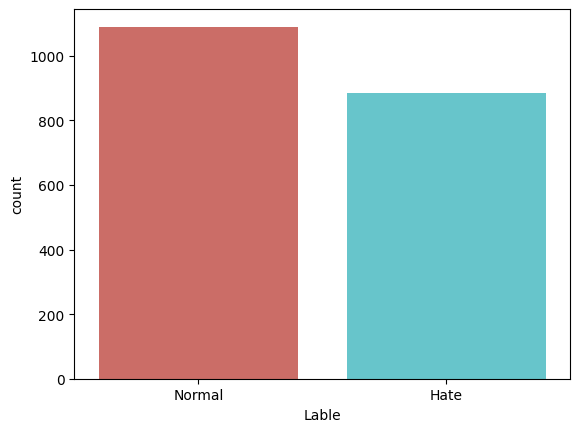

In [23]:
import seaborn as sb
def create_distribution(dataFile):
    plot = sb.countplot(x='Lable', data=dataFile, palette='hls')
    plot.set_xticklabels(['Normal', 'Hate'])
    return plot
create_distribution(dataset)

In [24]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=False)

In [25]:
# word2vec_model.most_similar('ፕሬዚዳንት')

In [26]:
# unk_token_index = tokenizer_df.word_index['unk']
# num_unk_tokens = np.sum(np.array(df_sequence) == unk_token_index)
# print("Number of 'unk' tokens: ", num_unk_tokens)

In [27]:
embedding_dim = word2vec_model.vector_size
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i > num_words:
        break
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

In [28]:
np.save(outputPath+'embedding_matrix_1.npy', embedding_matrix)

# Load the saved file and check if it matches the original embedding_matrix
#embedding_matrix = np.load(outputPath+'embedding_matrix_last_.npy')

# Text Model

In [29]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)


In [30]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## BiLSTM Model

In [31]:
#max_len=max_len+1
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_t = Sequential()
model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=
 [embedding_matrix], input_length=max_len+1, trainable=False))
model_t.add(Bidirectional(LSTM(32, return_sequences=True)))
model_t.add(BatchNormalization())
model_t.add(Dropout(0.2))
model_t.add(LSTM(64))
model_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_t.add(Dropout(0.2))
model_t.add(Dense(2, activation='softmax'))

model_t.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model_t.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5285 - loss: 1.0777 - val_accuracy: 0.5867 - val_loss: 0.9486
Epoch 2/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6469 - loss: 0.8674 - val_accuracy: 0.6684 - val_loss: 0.8364
Epoch 3/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7131 - loss: 0.7205 - val_accuracy: 0.6327 - val_loss: 0.7714
Epoch 4/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7345 - loss: 0.6266 - val_accuracy: 0.5510 - val_loss: 0.7540
Epoch 5/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7936 - loss: 0.5407 - val_accuracy: 0.5969 - val_loss: 0.6964
Epoch 6/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7758 - loss: 0.5196 - val_accuracy: 0.6071 - val_loss: 0.6958
Epoch 7/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8473 - loss: 0.3973 - val_accuracy: 0.5765 - val_loss: 0.7221
Epoch 8/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8638 - loss: 0.3430 - val_accuracy: 0.5918 - v

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model_t, to_file=outputPath+'BiLSTM_model.png', show_shapes=True, show_layer_names=True)
# Saving text model
model_t.save(outputPath+'BiLSTM_text_model.h5')

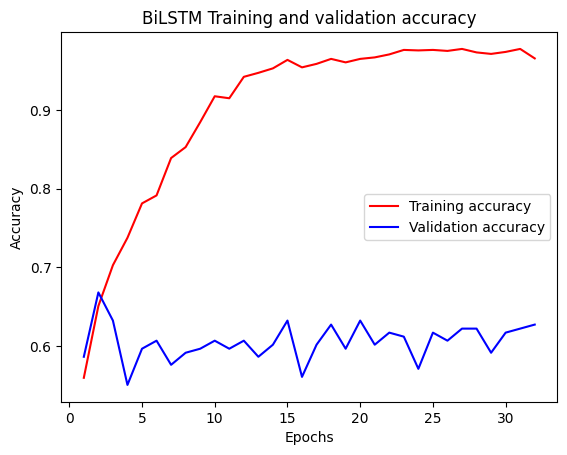

In [33]:
# Plotting training and validation accuracy and loss for combined model
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BiLSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Evaluate the model on test data
test_loss, test_acc = model_t.evaluate(X_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6526 - loss: 1.4338
Last accuracy value for training:  0.9652338624000549
Last accuracy value for testing:  0.6262626051902771
Last accuracy value for validation:  0.6275510191917419


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       110
           1       0.57      0.67      0.61        88

    accuracy                           0.63       198
   macro avg       0.63      0.63      0.63       198
weighted avg       0.64      0.63      0.63       198



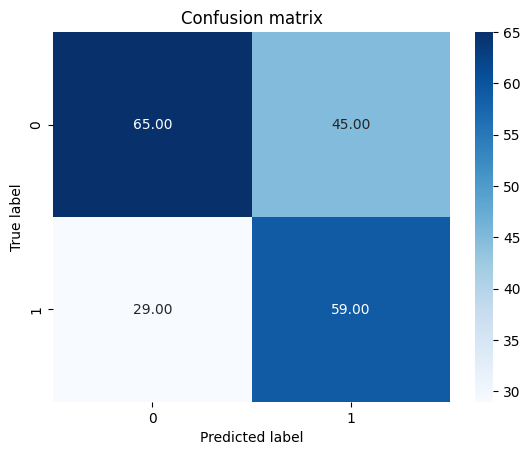

In [35]:
y_pred = model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


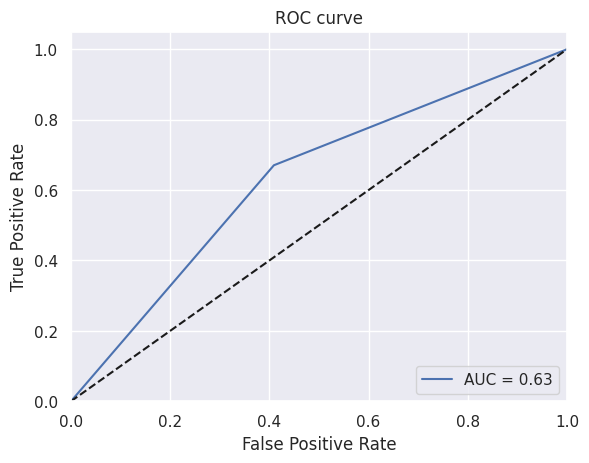

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
auc_score = roc_auc_score(y_test_classes, y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_classes)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## LSTM Model Development


In [37]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

LSTM_model_t = Sequential()
LSTM_model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
LSTM_model_t.add(LSTM(32, return_sequences=True))
LSTM_model_t.add(BatchNormalization())
LSTM_model_t.add(Dropout(0.2))
LSTM_model_t.add(LSTM(64))
LSTM_model_t.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
LSTM_model_t.add(Dropout(0.2))
LSTM_model_t.add(Dense(2, activation='softmax'))

LSTM_model_t.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
histry_lstm = LSTM_model_t.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5375 - loss: 1.0699 - val_accuracy: 0.5918 - val_loss: 0.9405
Epoch 2/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6296 - loss: 0.8645 - val_accuracy: 0.5714 - val_loss: 0.8274
Epoch 3/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6703 - loss: 0.7343 - val_accuracy: 0.5459 - val_loss: 0.7770
Epoch 4/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7305 - loss: 0.6393 - val_accuracy: 0.5459 - val_loss: 0.7424
Epoch 5/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7270 - loss: 0.5976 - val_accuracy: 0.5816 - val_loss: 0.7229
Epoch 6/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7721 - loss: 0.5226 - val_accuracy: 0.5255 - val_loss: 0.7202
Epoch 7/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7970 - loss: 0.4691 - val_accuracy: 0.5000 - val_loss: 0.7400
Epoch 8/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8163 - loss: 0.4485 - val_accuracy: 0.5816 - val_loss: 0.

In [38]:
plot_model(LSTM_model_t, to_file=outputPath+'LSTM_model.png', show_shapes=True, show_layer_names=True)
# Saving text model
LSTM_model_t.save(outputPath+'LSTM_text_model.h5')

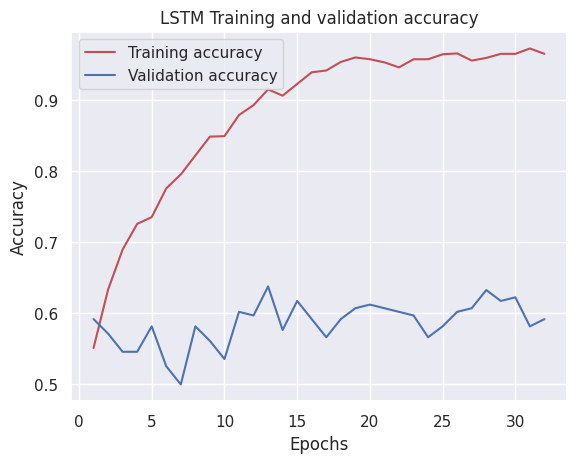

In [39]:
# Plotting training and validation accuracy and loss for combined model
train_acc = histry_lstm.history['accuracy']
train_loss = histry_lstm.history['loss']
val_acc = histry_lstm.history['val_accuracy']
val_loss = histry_lstm.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
# Evaluate the model on test data
test_loss, test_acc = LSTM_model_t.evaluate(X_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_lstm.history['accuracy'][-1]
val_acc = histry_lstm.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for validation: ", val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6508 - loss: 1.4751 
Last accuracy value for training:  0.9646017551422119
Last accuracy value for testing:  0.6161616444587708
Last accuracy value for validation:  0.5918367505073547


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       110
           1       0.57      0.57      0.57        88

    accuracy                           0.62       198
   macro avg       0.61      0.61      0.61       198
weighted avg       0.62      0.62      0.62       198



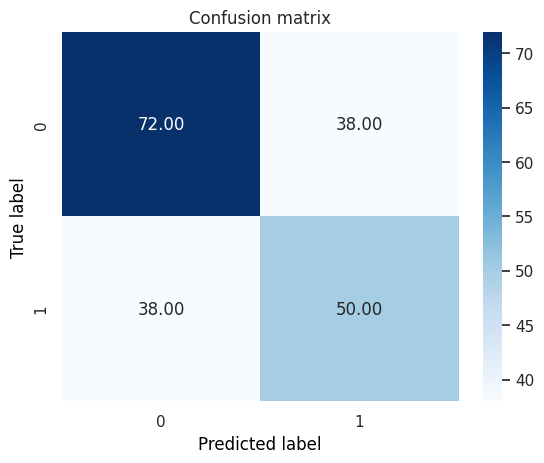

In [41]:
y_pred = LSTM_model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()


## CNN Model

In [42]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

CNN_model_t = Sequential()
CNN_model_t.add(Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len+1, trainable=False))
CNN_model_t.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNN_model_t.add(MaxPooling1D(pool_size=2))
CNN_model_t.add(BatchNormalization())
CNN_model_t.add(Dropout(0.2))
CNN_model_t.add(Flatten())
CNN_model_t.add(Dropout(0.2))
CNN_model_t.add(Dense(2, activation='softmax'))
CNN_model_t.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
histry_cnn = CNN_model_t.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val))
plot_model(CNN_model_t, to_file=outputPath+'cnn_model_t.png', show_shapes=True, show_layer_names=True)
CNN_model_t.save(outputPath+'CNN_text_model.h5')

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.5020 - loss: 0.7433 - val_accuracy: 0.5612 - val_loss: 0.6902
Epoch 2/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6775 - loss: 0.6237 - val_accuracy: 0.6020 - val_loss: 0.6901
Epoch 3/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7548 - loss: 0.5481 - val_accuracy: 0.5816 - val_loss: 0.6890
Epoch 4/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8367 - loss: 0.4515 - val_accuracy: 0.6327 - val_loss: 0.6835
Epoch 5/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.3951 - val_accuracy: 0.5561 - val_loss: 0.6823
Epoch 6/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8992 - loss: 0.3110 - val_accuracy: 0.5918 - val_loss: 0.6754
Epoch 7/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9362 - loss: 0.2467 - val_accuracy: 0.5969 - val_loss: 0.6700
Epoch 8/32
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9425 - loss: 0.2074 - val_accuracy: 0.5918 - val_loss: 0.6725
Ep

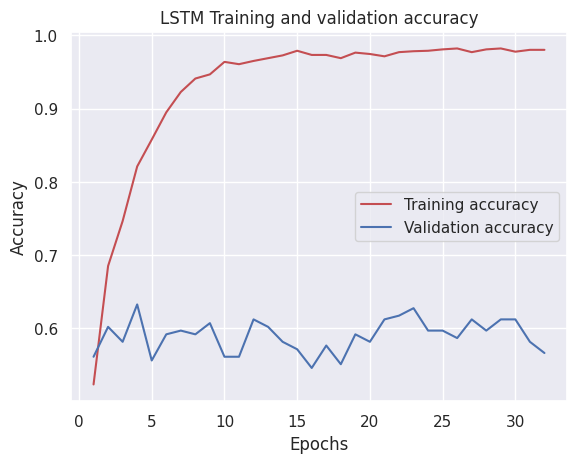

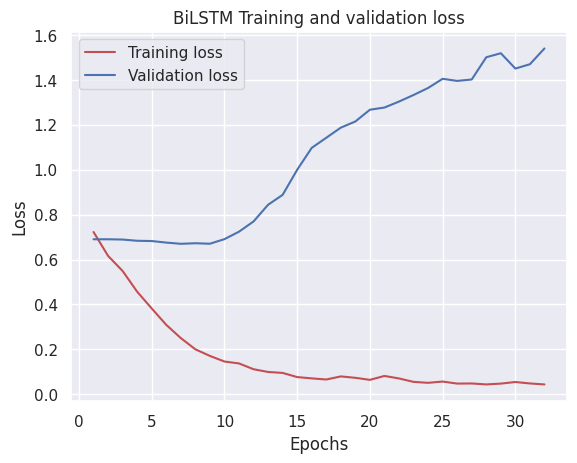

In [43]:

# Plotting training and validation accuracy and loss for combined model
train_acc = histry_cnn.history['accuracy']
train_loss = histry_cnn.history['loss']
val_acc = histry_cnn.history['val_accuracy']
val_loss = histry_cnn.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BiLSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("com_model_Acc_Loss.png")
plt.show()

In [44]:
# Evaluate the model on test data
test_loss, test_acc = CNN_model_t.evaluate(X_test, y_test)

# Get the last accuracy value for training and testing
train_acc_last = histry_cnn.history['accuracy'][-1]
val_accuracy = histry_cnn.history['val_accuracy'][-1]
test_acc_last = test_acc

# Print the last accuracy value for training and testing
print("Last accuracy value for training: ", train_acc_last)
print("Last accuracy value for testing: ", test_acc_last)
print("Last accuracy value for training: ", val_accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6886 - loss: 1.2032
Last accuracy value for training:  0.9804045557975769
Last accuracy value for testing:  0.6717171669006348
Last accuracy value for training:  0.5663265585899353


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       110
           1       0.61      0.70      0.66        88

    accuracy                           0.67       198
   macro avg       0.67      0.68      0.67       198
weighted avg       0.68      0.67      0.67       198



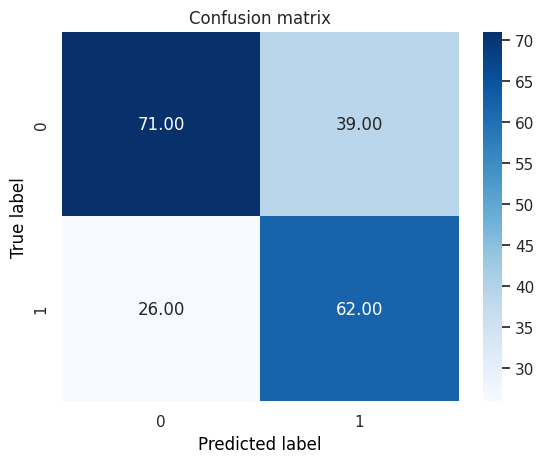

In [45]:
y_pred = CNN_model_t.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Generate heatmap of classification matrix
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
sns.set(font_scale=1.0)
plt.ylabel('True label', color='black')
plt.xlabel('Predicted label', color='black')
plt.title('Confusion matrix')

# Print classification report
pr = y_pred_classes
test_labels = np.argmax(y_test, axis=1)
report = metrics.classification_report(test_labels, pr)
print("Classification report:")
print(report)

plt.show()


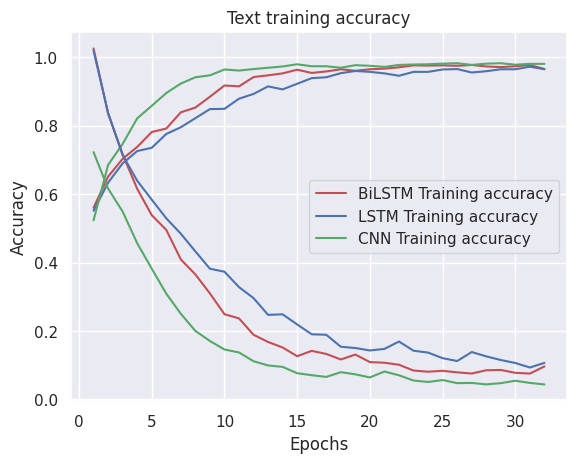

In [46]:
#Plotting training and validation accuracy for combined model
train_acc = history.history['accuracy']
lstm_train_acc = histry_lstm.history['accuracy']
CNN_train_acc = histry_cnn.history['accuracy']

train_acc_loss = history.history['loss']
lstm_train_acc_loss = histry_lstm.history['loss']
CNN_train_acc_loss = histry_cnn.history['loss']

epochs = range(1, len(history.history['accuracy'] )+ 1)
plt.plot(epochs, train_acc, 'r', label='BiLSTM Training accuracy')
plt.plot(epochs, lstm_train_acc, 'b', label='LSTM Training accuracy')
plt.plot(epochs, CNN_train_acc, 'g', label='CNN Training accuracy')


plt.plot(epochs, train_acc_loss, 'r')
plt.plot(epochs, lstm_train_acc_loss, 'b')
plt.plot(epochs, CNN_train_acc_loss, 'g')

plt.title('Text training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("com_model_Accuracy.png")
plt.show()



# Detecting Bias

## Ethnic Group Based Annotatioin

In [47]:
ethnic_keywords = {
    "Amhara": [
        # Identity
        "አማራ", "አማሮች", "አማራዊ", "አማራው", "አማራን", "አማራዎች", "አማራነት",
        "የአማራ", "ለአማራ", "በአማራ", "አማራ ነኝ", "አማራ ልጅ", "አማራ ሴት", "አማራ ወጣት",
        # Region & Cultural
        "አማራ ክልል", "አማራ ሕዝብ", "አማራ ብሄር", "አማራ ቤተሰብ", "አማራ ባህል",
        "የአማራ ቋንቋ", "የአማራ ታሪክ", "አማራ ስርዓት", "አማራ ልማድ", "የአማራ ምግብ",
        "ጎንደር", "ደብረ ብርሃን", "ባህር ዳር", "ደብረ ማርቆስ", "ሰሜን ሸዋ",
        # Political associations
        "አማራ ተወካይ", "አማራ እንቅስቃሴ", "አማራ ነብስ", "አማራ ፖለቲካ", "አማራ አመራር",
        "አማራ ልዩ ኃይል", "አማራ ሚዲያ", "አማራ ተቃውሞ", "አማራ ተሟጋች",
        # Armed groups & ideological
        "ፋኖ", "ፋኖው", "ፋኖዎች", "የፋኖ", "ፋኖ ኃይል", "የአማራ ሰራዊት", "አማራ ሠራዊት",
        "አማራ አብዮት", "አማራ ተከላ", "አማራ ተላላኪ",
        # Slurs / Hostile phrases
        "አማራ ጠላት", "አማራ ባለሥልጣን", "አማራ መንግሥት", "አማራ አፈና", "አማራ ግድያ",
        "አማራ ተገድሏል", "አማራ የሚጠላ"
    ],

    "Oromo": [
        # Identity
        "ኦሮሞ", "ኦሮሞዊ", "ኦሮሞች", "ኦሮሞዎች", "ኦሮሞን", "ኦሮሞው", "ኦሮሞነት",
        "የኦሮሞ", "በኦሮሞ", "ለኦሮሞ", "ኦሮሞ ነኝ", "ኦሮሞ ልጅ", "ኦሮሞ ሴት", "ኦሮሞ ወጣት",
        # Region & Cultural
        "ኦሮሞ ክልል", "ኦሮሞ ሕዝብ", "ኦሮሞ ብሄር", "ኦሮሚያ", "ኦሮሞ ባህል", "የኦሮሞ ቋንቋ",
        "የኦሮሞ ታሪክ", "ኦሮሞ ስርዓት", "ኦሮሞ ልማድ", "የኦሮሞ ምግብ",
        "ፊንፊኔ", "አዲስ አበባ", "ቦረና", "ነቀምት", "ሻሸመኔ",
        # Political associations
        "ኦሮሞ ፓርቲ", "ኦሮሞ እንቅስቃሴ", "ተወላጅ ኦሮሞ", "ኦሮሞ ፖለቲካ", "ኦሮሞ አመራር",
        "ኦሮሞ ልዩ ኃይል", "ኦሮሞ ሚዲያ", "ኦሮሞ ተቃውሞ", "ኦሮሞ ተሟጋች",
        # Armed groups / Movements
        "ዶላ", "ኦነግ", "የኦነግ", "የዶላ ተኳላኝ", "የኦሮሞ ኃይል", "OLF", "OLA", "የOLA",
        "ኦሮሞ ነፃ አውጭ", "ኦሮሞ አብዮት", "ኦሮሞ ተከላ", "ኦሮሞ ተላላኪ",
        # Slurs / Hostile phrases
        "ኦሮሞ ማፈናቀል", "ኦሮሞ የጦርነት ተቋማት", "ኦሮሞ ጠላት", "ኦሮሞ አፈና",
        "ኦሮሞ ግድያ", "ኦሮሞ ተገድሏል", "ኦሮሞ የሚጠላ"
    ],

    "Tigray": [
        # Identity
        "ትግራይ", "ትግሬ", "ትግሬዊ", "ትግሬዎች", "ትግሬው", "ትግሬን", "ትግራዋይ", "ትግራዊነት",
        "የትግሬ", "በትግራይ", "ለትግሬ", "ትግሬ ነኝ", "ትግሬ ልጅ", "ትግሬ ሴት", "ትግሬ ወጣት",
        # Region & Cultural
        "ትግሬ ክልል", "ትግሬ ሕዝብ", "ትግሬ ብሄር", "ትግራይ ህዝብ", "ትግሬ ባህል", "የትግሬ ቋንቋ",
        "የትግሬ ታሪክ", "ትግሬ ስርዓት", "ትግሬ ልማድ", "የትግሬ ምግብ",
        "መቐለ", "አድዋ", "አክሱም", "ማክለ", "ወጥ", "ሻርዕ",
        # Political associations
        "ኢህአዴግ", "የኢህአዴግ", "TPLF", "ትግሬ መሰረታዊ", "የTPLF ተናጋሪ", "ትግሬ ፖለቲካ",
        "ትግሬ አመራር", "ትግሬ ልዩ ኃይል", "ትግሬ ሚዲያ", "ትግሬ ተቃውሞ", "ትግሬ ተሟጋች",
        # Armed group terms
        "የTPLF ኃይል", "የትግሬ ጦር", "የትግሬ ጥቃት", "ትግሬ ሰራዊት", "ትግሬ አብዮት", "ትግሬ ተከላ", "ትግሬ ተላላኪ",
        # Slurs / Hostile phrases
        "ትግሬ ጠላት", "ትግሬ ፍቅር የሌለው", "ትግሬ የሃገር አሳዛኝ", "ትግሬ አፈና", "ትግሬ ግድያ", "ትግሬ ተገድሏል", "ትግሬ የሚጠላ"
    ],
}

In [48]:
def detect_group_with_confidence(text, keyword_dict):
    match_scores = {}
    for group, keywords in keyword_dict.items():
        count = sum(1 for kw in keywords if kw in text)
        if count > 0:
            match_scores[group] = count
    if match_scores:
        best_group = max(match_scores, key=match_scores.get)
        return best_group, match_scores[best_group]
    return "Other", 0


## Data Selection and Preprocessing

In [49]:
df = dataset

In [50]:
df.head()

,image,text,Lable
0,2,በስተመጨረሻም የጎል ቀበኛዋ የእግርኳ ፋጡማ ጉል ኳታር ደርሳለች,1
1,1,የአርባምንጭ ቤተሰብ ፈልገውት ሲጠሩት ገሽ አለሁ እዚ እየተጫወትኩ,0
2,3,ጅቦች,1
3,17,ቀልድ በአማራ,0
4,4,ጠላቶቻችን አማራ እራሱን ለመከላከል መደራጀት የግድ,1


In [51]:
# Apply the function to each row
df[["group", "group_confidence"]] = df["text"].apply(
    lambda x: pd.Series(detect_group_with_confidence(str(x), ethnic_keywords))
)


In [52]:
group_counts = df.groupby(["group", "Lable"]).size().unstack(fill_value=0)
print(group_counts)


Lable     0    1
group           
Amhara  158   67
Oromo    21   27
Other   892  776
Tigray   19   16


In [53]:
min_samples = (
    df.groupby(["group", "Lable"])
    .size()
    .reset_index(name="count")
    .groupby("group")["count"]
    .min()
    .min()
)
min_samples

16

In [54]:
balanced_df = (
    df.groupby(["group", "Lable"], group_keys=False)
    .apply(lambda x: x.sample(n=min_samples, random_state=42))
    .reset_index(drop=True)
)
balanced_df.head()

/tmp/ipython-input-54-723416121.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_samples, random_state=42))


,image,text,Lable,group,group_confidence
0,1762,አማራ,0,Amhara,1
1,1091,የተወካዮች ምቤት የአቶ ደመቀና የአማራ ርእሰ መስተዳድር የሀዘን መግለጫ,0,Amhara,2
2,1795,ፋኖ አማራ,0,Amhara,2
3,1604,ስቢሳ ሁለገብ የመኖሪያ አፓርታማ ንግድ አማራ,0,Amhara,1
4,1383,ሬጅመንት አማራ,0,Amhara,1


In [55]:
balanced_df.drop(columns=["image"], inplace=True)

In [56]:
balanced_df.head()

,text,Lable,group,group_confidence
0,አማራ,0,Amhara,1
1,የተወካዮች ምቤት የአቶ ደመቀና የአማራ ርእሰ መስተዳድር የሀዘን መግለጫ,0,Amhara,2
2,ፋኖ አማራ,0,Amhara,2
3,ስቢሳ ሁለገብ የመኖሪያ አፓርታማ ንግድ አማራ,0,Amhara,1
4,ሬጅመንት አማራ,0,Amhara,1


In [57]:
import pandas as pd

# File pairs to process
file_pairs = [
    ("/content/drive/MyDrive/XAI_Dataset/labelled/train_category.csv", "/content/drive/MyDrive/XAI_Dataset/train_target.csv", "/content/drive/MyDrive/XAI_Dataset/train_merged.csv"),
    ("/content/drive/MyDrive/XAI_Dataset/labelled/test_category.csv", "/content/drive/MyDrive/XAI_Dataset/test_target.csv", "/content/drive/MyDrive/XAI_Dataset/test_merged.csv"),
    ("/content/drive/MyDrive/XAI_Dataset/labelled/dev_category.csv", "/content/drive/MyDrive/XAI_Dataset/dev_target.csv", "/content/drive/MyDrive/XAI_Dataset/dev_merged.csv"),
]

for label_file, target_file, output_file in file_pairs:
    df_label = pd.read_csv(label_file)
    df_target = pd.read_csv(target_file)

    df_merged = pd.merge(df_label, df_target[["tweet_id", "target"]], on="tweet_id", how="left")
    df_merged.to_csv(output_file, index=False)
    print(f"Merged and saved: {output_file}")


Merged and saved: /content/drive/MyDrive/XAI_Dataset/train_merged.csv
Merged and saved: /content/drive/MyDrive/XAI_Dataset/test_merged.csv
Merged and saved: /content/drive/MyDrive/XAI_Dataset/dev_merged.csv


In [58]:
train_merged = pd.read_csv("/content/drive/MyDrive/XAI_Dataset/train_merged.csv")
test_merged = pd.read_csv("/content/drive/MyDrive/XAI_Dataset/test_merged.csv")
dev_merged = pd.read_csv("/content/drive/MyDrive/XAI_Dataset/dev_merged.csv")

In [59]:
# Concatenate all into one DataFrame
full_merged = pd.concat([train_merged, test_merged, dev_merged], ignore_index=True)
# Replace 'offensive' with 'hate' in the 'label' column
full_merged['label'] = full_merged['label'].replace('offensive', 'hate')
label_map = {'normal': 0, 'hate': 1}
full_merged['label'] = full_merged['label'].map(label_map)
# Save to new CSV
full_merged.to_csv("/content/drive/MyDrive/XAI_Dataset/full_merged.csv", index=False)


In [60]:
full_merged.head()

,tweet_id,tweet,label,target
0,1477425702182006785,@USER ኢትዮጵያ እላርጂከ ናት ለነዚህ ህጎች።,0,politics
1,1477429109215088641,@USER አማራን ለመታገል በህውሃት የተመሰረተው ሆድ አደሩ ብአዴንና ጀሌ...,1,politics
2,1477440329825480711,@USER ሰይጣን እራሱ መጥቶ እኔ ነኝ የገደልኩት ቢልኳን ንልጽግና ነው ...,1,NOTARGET
3,1477450877720055809,ኢህአዴጉን አብይ አህመድ አቅፈው፤ ልደቱ ከኢህአዴ ጋር ይቀራረብ ነበር የ...,1,politics
4,1477474359333826560,@USER ታዲያ እንዳንተ ያልተማረ ፋሽስት እየመራ የአገሪቱን እድገት ወደ...,1,politics


In [61]:
# Apply the function to each row
full_merged[["group", "group_confidence"]] = full_merged["tweet"].apply(
    lambda x: pd.Series(detect_group_with_confidence(str(x), ethnic_keywords))
)

In [62]:
full_merged.head()

,tweet_id,tweet,label,target,group,group_confidence
0,1477425702182006785,@USER ኢትዮጵያ እላርጂከ ናት ለነዚህ ህጎች።,0,politics,Other,0
1,1477429109215088641,@USER አማራን ለመታገል በህውሃት የተመሰረተው ሆድ አደሩ ብአዴንና ጀሌ...,1,politics,Amhara,3
2,1477440329825480711,@USER ሰይጣን እራሱ መጥቶ እኔ ነኝ የገደልኩት ቢልኳን ንልጽግና ነው ...,1,NOTARGET,Other,0
3,1477450877720055809,ኢህአዴጉን አብይ አህመድ አቅፈው፤ ልደቱ ከኢህአዴ ጋር ይቀራረብ ነበር የ...,1,politics,Other,0
4,1477474359333826560,@USER ታዲያ እንዳንተ ያልተማረ ፋሽስት እየመራ የአገሪቱን እድገት ወደ...,1,politics,Other,0


In [63]:
group_counts_ag = full_merged.groupby(["group", "label"]).size().unstack(fill_value=0)
print(group_counts_ag)

label      0     1
group             
Amhara    71  1148
Oromo     64   461
Other   1744  4375
Tigray    66   329


In [64]:
min_samples_ag = (
    full_merged.groupby(["group", "label"])
    .size()
    .reset_index(name="count")
    .groupby("group")["count"]
    .min()
    .min()
)
min_samples_ag

64

In [65]:
balanced_df_ag = (
    full_merged.groupby(["group", "label"], group_keys=False)
    .apply(lambda x: x.sample(n=min_samples_ag, random_state=42))
    .reset_index(drop=True)
)
balanced_df_ag.head()

/tmp/ipython-input-65-2154315214.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_samples_ag, random_state=42))


,tweet_id,tweet,label,target,group,group_confidence
0,1501821579780509698,#March8ን ስናስብ #በአፋር_በአማራ_በኦሮሚያ የተጨፈጨፉትን፣ የተደፈሩ...,0,ethnic,Amhara,2
1,1477805062449684484,ሐገርም: አህጉርም: ከተማም: መንደርም: መሆን: ይችላሉ: ነገርግን: አን...,0,ethnic,Amhara,3
2,1645270650909782016,@USER ስጋቱን ከግምት ያስገባ መተማመንን የሚፈጥር ጠለቅ ያለ በብልሀት...,0,ethnic,Amhara,2
3,1483657633395576834,@USER ደረጀ ምን ለማለት ፈልገህ ነው ይህንን ሃሳብ ያራመድከው ግለሰቦ...,0,NOTARGET,Amhara,2
4,1489672342020231168,#የሚሟገቱልንን_እናመስግን???? ከፍተኛ ዘረፋና መንግስታዊ ሴራ ለተሰራበ...,0,ethnic,Amhara,1


In [66]:
balanced_df_ag.drop(columns=["tweet_id", "target"], inplace=True)
balanced_df_ag.rename(columns={"tweet": "text", "label":"Lable"}, inplace=True)

balanced_df_ag.head()

,text,Lable,group,group_confidence
0,#March8ን ስናስብ #በአፋር_በአማራ_በኦሮሚያ የተጨፈጨፉትን፣ የተደፈሩ...,0,Amhara,2
1,ሐገርም: አህጉርም: ከተማም: መንደርም: መሆን: ይችላሉ: ነገርግን: አን...,0,Amhara,3
2,@USER ስጋቱን ከግምት ያስገባ መተማመንን የሚፈጥር ጠለቅ ያለ በብልሀት...,0,Amhara,2
3,@USER ደረጀ ምን ለማለት ፈልገህ ነው ይህንን ሃሳብ ያራመድከው ግለሰቦ...,0,Amhara,2
4,#የሚሟገቱልንን_እናመስግን???? ከፍተኛ ዘረፋና መንግስታዊ ሴራ ለተሰራበ...,0,Amhara,1


In [67]:
balanced_df = pd.concat([balanced_df, balanced_df_ag], ignore_index=True)
balanced_df.head()

,text,Lable,group,group_confidence
0,አማራ,0,Amhara,1
1,የተወካዮች ምቤት የአቶ ደመቀና የአማራ ርእሰ መስተዳድር የሀዘን መግለጫ,0,Amhara,2
2,ፋኖ አማራ,0,Amhara,2
3,ስቢሳ ሁለገብ የመኖሪያ አፓርታማ ንግድ አማራ,0,Amhara,1
4,ሬጅመንት አማራ,0,Amhara,1


In [68]:
balanced_df.shape

(640, 4)

In [69]:
balanced_df_ag.shape

(512, 4)

In [70]:
# Preprocess the text by tokenizing and removing stop words
sentences_bdf = balanced_df['text'].tolist()
tokenizer_bdf = Tokenizer()
tokenizer_bdf.fit_on_texts(sentences_bdf)
word_index_bdf = tokenizer_bdf.word_index
sequences_bdf = tokenizer_bdf.texts_to_sequences(sentences_bdf)
max_len = max([len(seq) for seq in sequences_bdf])
padded_sequences_bdf= pad_sequences(sequences_bdf, maxlen=max_len)

In [71]:
# # Preprocess the text by tokenizing and removing stop words
# sentences_bdf_ag = balanced_df_ag['tweet'].tolist()
# tokenizer_bdf_ag = Tokenizer()
# tokenizer_bdf_ag.fit_on_texts(sentences_bdf_ag)
# word_index_bdf_ag = tokenizer_bdf_ag.word_index
# sequences_bdf_ag = tokenizer_bdf_ag.texts_to_sequences(sentences_bdf_ag)
# max_len = max([len(seq) for seq in sequences_bdf_ag])
# padded_sequences_bdf_ag= pad_sequences(sequences_bdf_ag, maxlen=max_len)

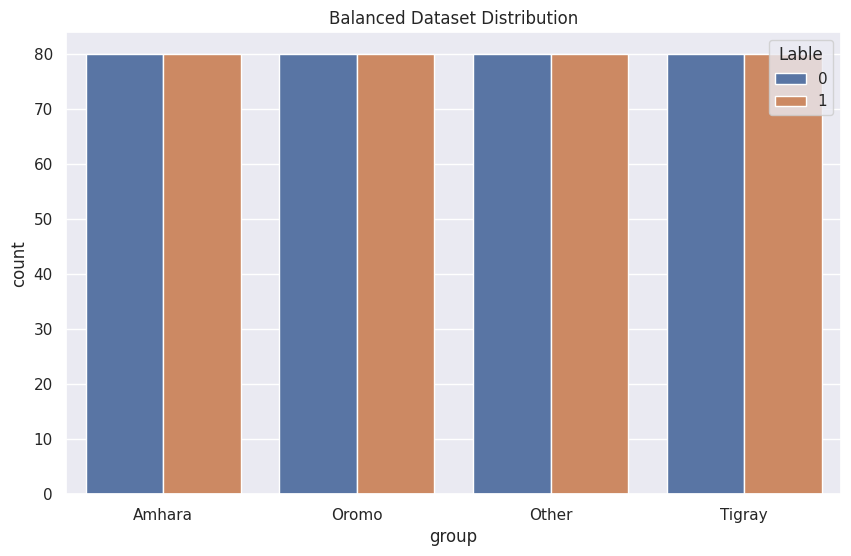

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x="group", hue="Lable")
plt.title("Balanced Dataset Distribution")
plt.show()


In [73]:
X_bdf = pd.DataFrame(padded_sequences)
y_bdf = balanced_df['Lable']

## Exploring test data

In [74]:
X_bdf.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2144,2145,2146,2147,2148,2149,1046,2150
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2151,29,2152,2153,2154,2155,403,2156
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1047
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,404,18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2157,2,285,1048,2158,1049


In [75]:
X_test.head()

,image,0,1,2,3,4,5,6,7,8,...,46,47,48,49,50,51,52,53,54,55
1405,1435,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7222,995,7223,864,7224,1977
1161,1286,0,0,0,0,0,0,0,0,0,...,0,1119,363,29,81,425,6351,52,55,35
397,619,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3357,753,350,754,1342,1343
181,326,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2647,633,2648,129,84,102
1086,858,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,951,6028,11,92,6029


In [76]:
# # For LSTM
preds_lstm = LSTM_model_t.predict(padded_sequences_bdf)  # if only sequences used
lstm_pred_classes = np.argmax(preds_lstm, axis=1)
# # For BiLSTM
preds_bilstm = model_t.predict(padded_sequences_bdf)
bilstm_pred_classes = np.argmax(preds_bilstm, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [77]:
lstm_pred_classes

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [78]:
index_to_label = {0: "normal speech", 1: "hate speech"}
lstm_labels = [index_to_label[i] for i in lstm_pred_classes]
bilstm_labels = [index_to_label[i] for i in bilstm_pred_classes]

In [79]:
balanced_df["pred_lstm"] = lstm_pred_classes
balanced_df["pred_bilstm"] = bilstm_pred_classes


In [80]:
balanced_df.head()

,text,Lable,group,group_confidence,pred_lstm,pred_bilstm
0,አማራ,0,Amhara,1,1,1
1,የተወካዮች ምቤት የአቶ ደመቀና የአማራ ርእሰ መስተዳድር የሀዘን መግለጫ,0,Amhara,2,0,0
2,ፋኖ አማራ,0,Amhara,2,1,1
3,ስቢሳ ሁለገብ የመኖሪያ አፓርታማ ንግድ አማራ,0,Amhara,1,1,1
4,ሬጅመንት አማራ,0,Amhara,1,1,1


## Group-wise Evaluation of Fairness

In [81]:
from sklearn.metrics import classification_report
import pandas as pd
def group_metrics(df, prediction_column):
    groups = df["group"].unique()
    reports = {}

    for group in groups:
        subset = df[df["group"] == group]
        y_true = subset["Lable"]
        y_pred = subset[prediction_column]

        report = classification_report(
            y_true, y_pred, output_dict=True, zero_division=0
        )

        reports[group] = {
            "f1_macro": report["macro avg"]["f1-score"],
            "accuracy": report["accuracy"]
        }

    return pd.DataFrame.from_dict(reports, orient="index")


In [82]:
lstm_report = group_metrics(balanced_df, "pred_lstm")
lstm_report["model"] = "LSTM"

bilstm_report = group_metrics(balanced_df, "pred_bilstm")
bilstm_report["model"] = "BiLSTM"


In [83]:
fairness_df = pd.concat([lstm_report, bilstm_report])
fairness_df.reset_index(inplace=True)
fairness_df.rename(columns={"index": "group"}, inplace=True)


In [84]:
print(fairness_df)

    group  f1_macro  accuracy   model
0  Amhara  0.524926   0.52500    LSTM
1   Oromo  0.407967   0.41250    LSTM
2   Other  0.543590   0.54375    LSTM
3  Tigray  0.430694   0.43125    LSTM
4  Amhara  0.499188   0.50625  BiLSTM
5   Oromo  0.457071   0.46250  BiLSTM
6   Other  0.489479   0.50625  BiLSTM
7  Tigray  0.484601   0.48750  BiLSTM


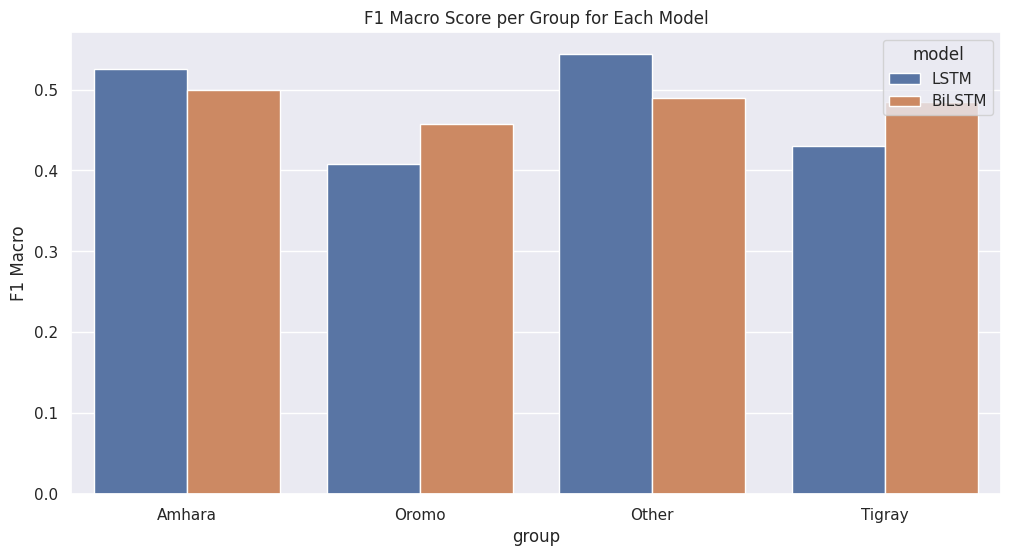

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=fairness_df, x="group", y="f1_macro", hue="model")
plt.title("F1 Macro Score per Group for Each Model")
plt.ylabel("F1 Macro")
plt.show()


## Bias Quantification

In [86]:
def quantify_bias(fairness_df, metric="f1_macro"):
    summary = {}
    grouped = fairness_df.groupby("model")

    for model, group_df in grouped:
        values = group_df[metric].values

        summary[model] = {
            "max_f1": values.max(),
            "min_f1": values.min(),
            "gap_f1": values.max() - values.min(),
            "std_f1": values.std(),
            "f1_ratio_min_max": values.min() / values.max() if values.max() != 0 else 0
        }

    return pd.DataFrame(summary).T


In [87]:
bias_summary = quantify_bias(fairness_df, metric="f1_macro")
bias_summary.reset_index(inplace=True)
bias_summary.rename(columns={"index": "model"}, inplace=True)


In [88]:
print(bias_summary)


    model    max_f1    min_f1    gap_f1    std_f1  f1_ratio_min_max
0  BiLSTM  0.499188  0.457071  0.042117  0.015638          0.915629
1    LSTM  0.543590  0.407967  0.135622  0.058397          0.750506


/tmp/ipython-input-89-1309650521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bias_summary, x="model", y="gap_f1", palette="coolwarm")


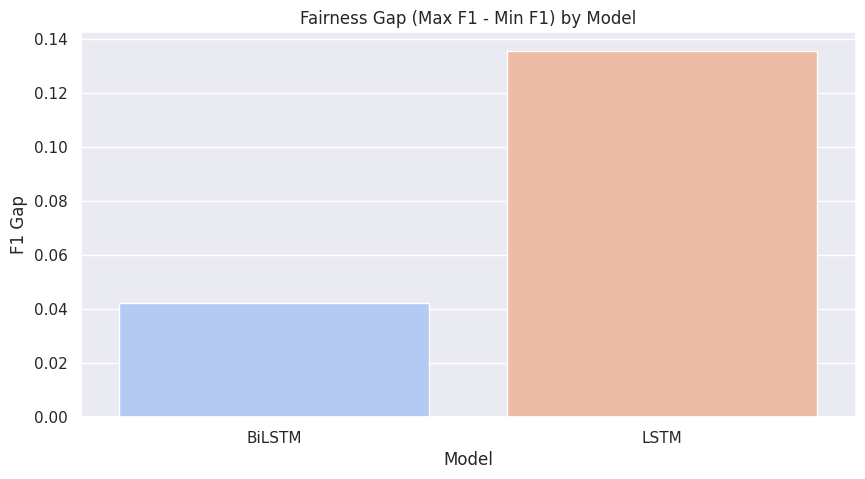

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=bias_summary, x="model", y="gap_f1", palette="coolwarm")
plt.title("Fairness Gap (Max F1 - Min F1) by Model")
plt.ylabel("F1 Gap")
plt.xlabel("Model")
plt.show()


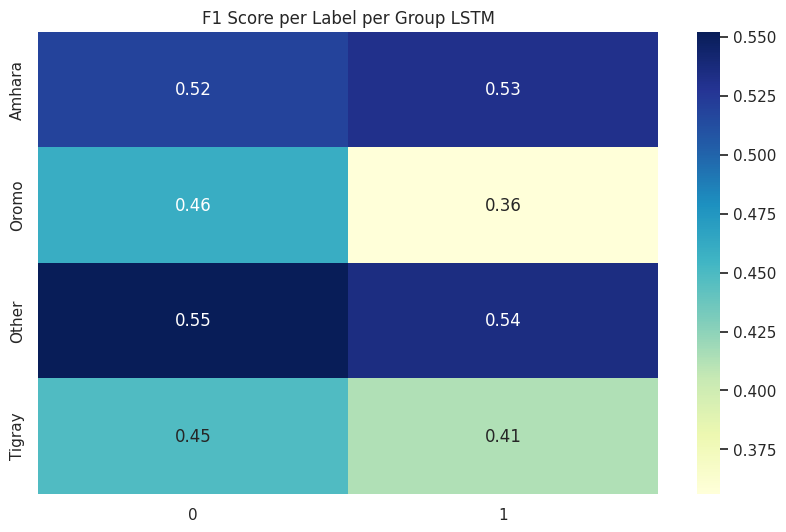

In [90]:
from sklearn.metrics import f1_score

def subgroup_f1_matrix(df, pred_col):
    labels = df["Lable"].unique()
    groups = df["group"].unique()
    matrix = pd.DataFrame(index=groups, columns=labels)

    for group in groups:
        for label in labels:
            subset = df[df["group"] == group]
            true = subset["Lable"] == label
            pred = subset[pred_col] == label
            f1 = f1_score(true, pred)
            matrix.loc[group, label] = f1

    return matrix.astype(float)
subgroup_matrix = subgroup_f1_matrix(balanced_df, "pred_lstm")
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(subgroup_matrix, annot=True, cmap="YlGnBu")
plt.title("F1 Score per Label per Group LSTM")
plt.show()


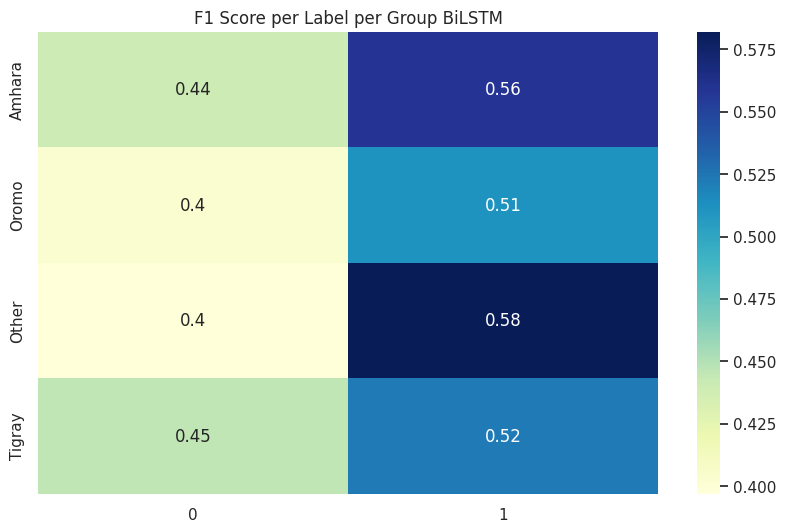

In [91]:
from sklearn.metrics import f1_score

def subgroup_f1_matrix(df, pred_col):
    labels = df["Lable"].unique()
    groups = df["group"].unique()
    matrix = pd.DataFrame(index=groups, columns=labels)

    for group in groups:
        for label in labels:
            subset = df[df["group"] == group]
            true = subset["Lable"] == label
            pred = subset[pred_col] == label
            f1 = f1_score(true, pred)
            matrix.loc[group, label] = f1

    return matrix.astype(float)

# Example for CNN
subgroup_matrix = subgroup_f1_matrix(balanced_df, "pred_bilstm")

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(subgroup_matrix, annot=True, cmap="YlGnBu")
plt.title("F1 Score per Label per Group BiLSTM")
plt.show()


### Statistical Significance Tests (Chi-Square)

In [92]:
from scipy.stats import chi2_contingency

def group_label_distribution_test(df, group1, group2, pred_col):
    g1 = df[df["group"] == group1][pred_col].value_counts()
    g2 = df[df["group"] == group2][pred_col].value_counts()

    combined = pd.DataFrame([g1, g2]).fillna(0)
    stat, p, dof, _ = chi2_contingency(combined)

    return stat, p
stat, p = group_label_distribution_test(balanced_df, "Amhara", "Oromo", "pred_lstm")
print(f"Chi-square statistic: {stat:.3f}, p-value: {p:.4f}")

stat, p = group_label_distribution_test(balanced_df, "Amhara", "Tigray", "pred_lstm")
print(f"Chi-square statistic: {stat:.3f}, p-value: {p:.4f}")

stat, p = group_label_distribution_test(balanced_df, "Tigray", "Oromo", "pred_lstm")
print(f"Chi-square statistic: {stat:.3f}, p-value: {p:.4f}")



Chi-square statistic: 2.828, p-value: 0.0926
Chi-square statistic: 0.450, p-value: 0.5023
Chi-square statistic: 0.811, p-value: 0.3677


In [93]:
from scipy.stats import chi2_contingency

def group_label_distribution_test(df, group1, group2, pred_col):
    g1 = df[df["group"] == group1][pred_col].value_counts()
    g2 = df[df["group"] == group2][pred_col].value_counts()

    combined = pd.DataFrame([g1, g2]).fillna(0)
    stat, p, dof, _ = chi2_contingency(combined)

    return stat, p
stat, p = group_label_distribution_test(balanced_df, "Amhara", "Oromo", "pred_bilstm")
print(f"Chi-square statistic: {stat:.3f}, p-value: {p:.4f}")

stat, p = group_label_distribution_test(balanced_df, "Amhara", "Tigray", "pred_bilstm")
print(f"Chi-square statistic: {stat:.3f}, p-value: {p:.4f}")

stat, p = group_label_distribution_test(balanced_df, "Tigray", "Oromo", "pred_bilstm")
print(f"Chi-square statistic: {stat:.3f}, p-value: {p:.4f}")



Chi-square statistic: 0.053, p-value: 0.8187
Chi-square statistic: 0.468, p-value: 0.4941
Chi-square statistic: 0.116, p-value: 0.7334


###  Counterfactual Fairness Testing

In [94]:
def counterfactual_prediction(original_text, replacement_dict, model, tokenizer, max_len):
    cf_text = original_text
    for src, tgt in replacement_dict.items():
        cf_text = cf_text.replace(src, tgt)

    sequence = tokenizer.texts_to_sequences([cf_text])
    padded = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(padded)
    return np.argmax(pred)

# Test:
amh_text = "የትግራይ ሕዝብን ማጥፋት ነው"
replacement = {"የትግራይ": "ኦሮሞ"}

orig_pred = counterfactual_prediction(amh_text, {}, model_t, tokenizer, max_len=57)
cf_pred   = counterfactual_prediction(amh_text, replacement, model_t, tokenizer, max_len=57)

print(f"Original: {orig_pred}, Counterfactual: {cf_pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Original: 0, Counterfactual: 1


In [95]:
# Test:
amh_text = "አማራ ሕዝብን ማጥፋት ነው"
replacement = {"አማራ": "ኦሮሞ"}

orig_pred = counterfactual_prediction(amh_text, {}, LSTM_model_t, tokenizer, max_len=57)
cf_pred   = counterfactual_prediction(amh_text, replacement, LSTM_model_t, tokenizer, max_len=57)

print(f"Original: {orig_pred}, Counterfactual: {cf_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Original: 0, Counterfactual: 1


### Demographic Parity

In [96]:
def demographic_parity(df, pred_col):
    groups = df["group"].unique()
    labels = df[pred_col].unique()
    results = []

    for group in groups:
        subset = df[df["group"] == group]
        total = len(subset)

        for label in labels:
            count = (subset[pred_col] == label).sum()
            proportion = count / total
            results.append({
                "group": group,
                "label": label,
                "proportion": proportion,
                "count": count,
                "total": total
            })

    return pd.DataFrame(results)


In [97]:
parity_lstm = demographic_parity(balanced_df, "pred_lstm")
parity_lstm["model"] = "LSTM"

parity_bilstm = demographic_parity(balanced_df, "pred_bilstm")
parity_bilstm["model"] = "BiLSTM"

parity_df = pd.concat([ parity_lstm, parity_bilstm])


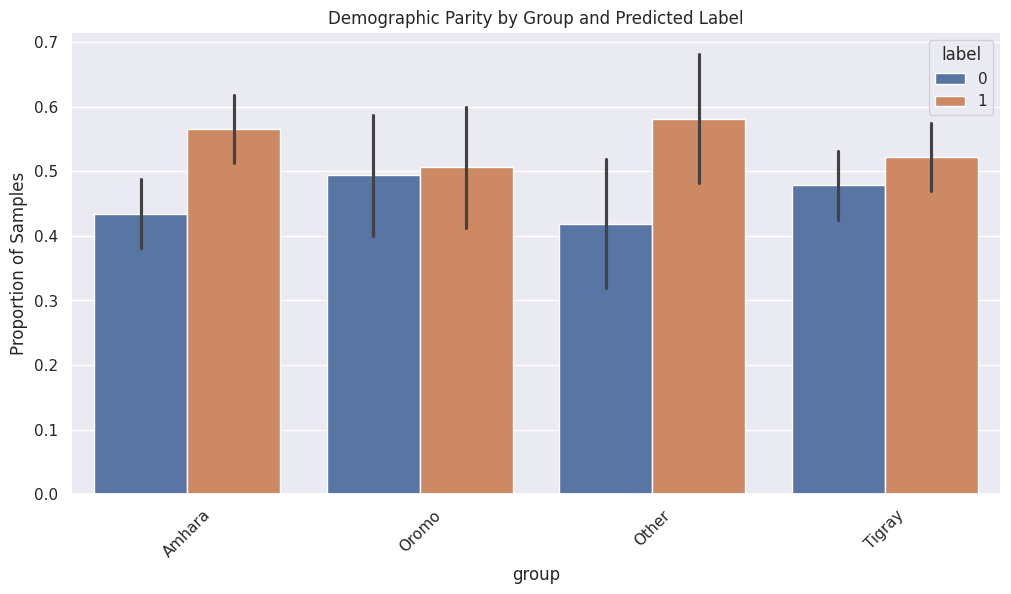

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=parity_df, x="group", y="proportion", hue="label")
plt.title("Demographic Parity by Group and Predicted Label")
plt.ylabel("Proportion of Samples")
plt.xticks(rotation=45)
plt.show()



###  Equalized Odds



In [99]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def equalized_odds(df, pred_col):
    groups = df["group"].unique()
    labels = df["Lable"].unique()  # use string labels for clarity
    results = []

    for group in groups:
        subset = df[df["group"] == group]
        y_true = subset["Lable"]
        y_pred = subset[pred_col]

        for label in labels:
            # Binarize for the current label: 1 = label, 0 = others
            y_true_bin = (y_true == label).astype(int)
            y_pred_bin = (y_pred == label).astype(int)

            tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin).ravel()

            tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
            fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan

            results.append({
                "group": group,
                "label": label,
                "TPR": tpr,
                "FPR": fpr,
                "model": pred_col
            })

    return pd.DataFrame(results)


In [100]:
eo_lstm = equalized_odds(balanced_df, "pred_lstm")
eo_bilstm = equalized_odds(balanced_df, "pred_bilstm")

eo_df = pd.concat([eo_lstm, eo_bilstm])


In [101]:
eo_df

,group,label,TPR,FPR,model
0,Amhara,0,0.5125,0.4625,pred_lstm
1,Amhara,1,0.5375,0.4875,pred_lstm
2,Oromo,0,0.5000,0.6750,pred_lstm
3,Oromo,1,0.3250,0.5000,pred_lstm
4,Other,0,0.5625,0.4750,pred_lstm
5,Other,1,0.5250,0.4375,pred_lstm
6,Tigray,0,0.4625,0.6000,pred_lstm
7,Tigray,1,0.4000,0.5375,pred_lstm
0,Amhara,0,0.3875,0.3750,pred_bilstm
1,Amhara,1,0.6250,0.6125,pred_bilstm


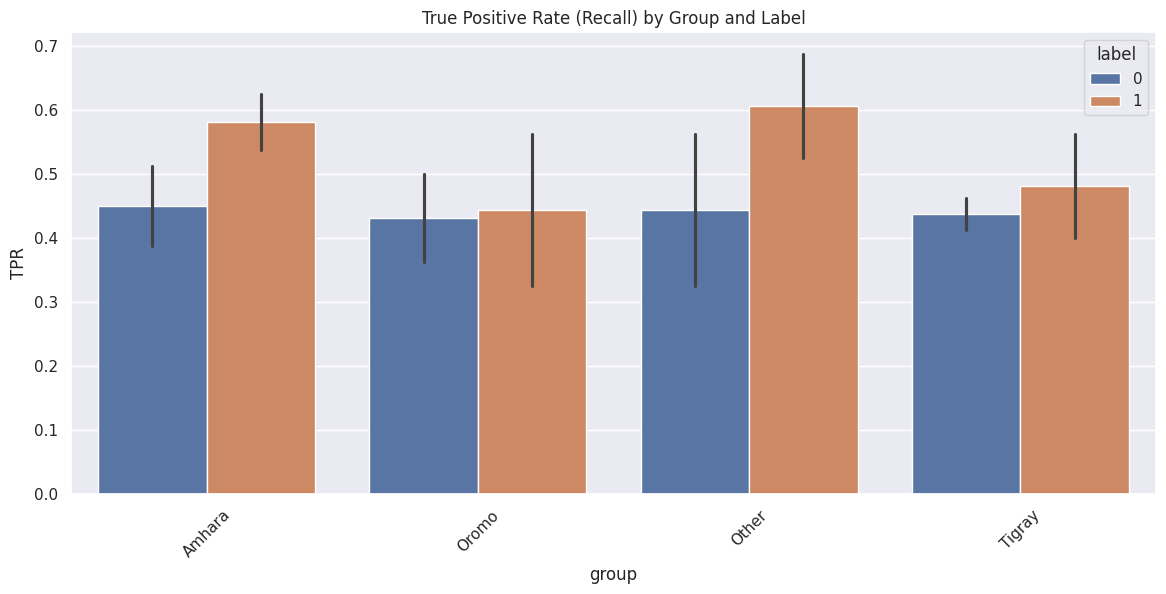

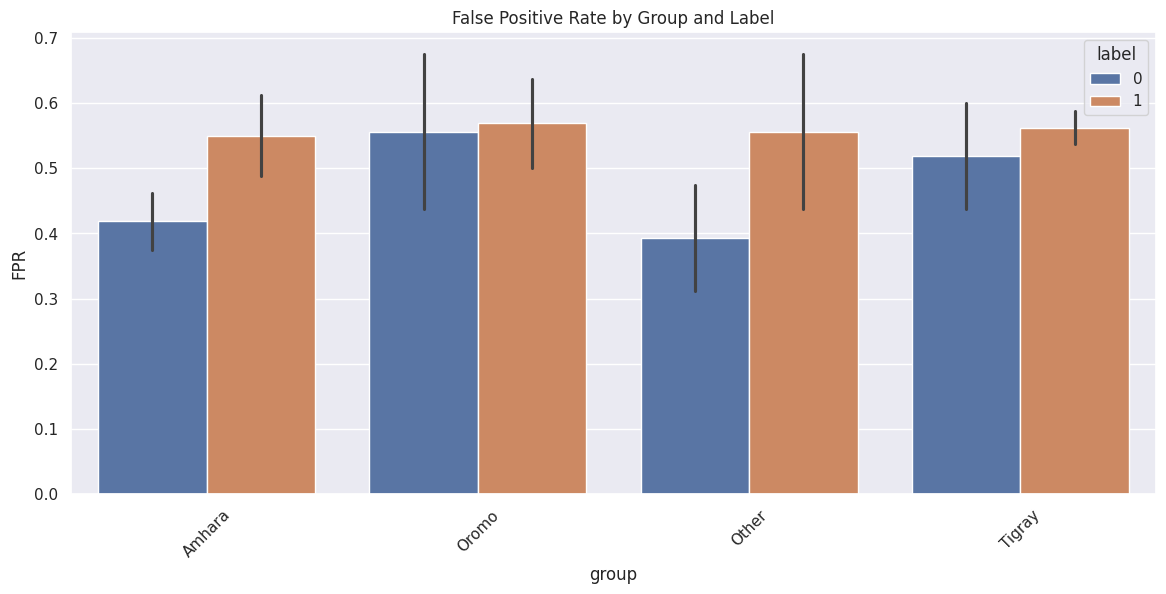

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=eo_df, x="group", y="TPR", hue="label")
plt.title("True Positive Rate (Recall) by Group and Label")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=eo_df, x="group", y="FPR", hue="label")
plt.title("False Positive Rate by Group and Label")
plt.xticks(rotation=45)
plt.show()


**Findings**

**LSTM Model**:

TPR for label=1 (hate speech) ranges from 0.375 (Oromo) to 0.537 (Other).

FPR for label=0 (non-hate) ranges from 0.462 (Other) to 0.625 (Oromo).

**BiLSTM Model**:

TPR for label=1 drops to 0.225 for Tigray and 0.262 for Oromo, compared to 0.437 for Other.

FPR is highest for Tigray (0.775) and Oromo (0.737).

**Interpretation**

Both models exhibit notable disparities in performance across ethnic groups. Specifically:

Lower TPRs for Tigray and Oromo indicate under-detection of hate speech.

Higher FPRs for these same groups suggest over-flagging of non-hate content as hate.

This violates the equalized odds criterion, signaling the presence of group-based bias in both models. The BiLSTM model shows even more pronounced bias compared to the LSTM.

# Bias Mitigation

## Adversarial Training

In [103]:
balanced_df.head()

,text,Lable,group,group_confidence,pred_lstm,pred_bilstm
0,አማራ,0,Amhara,1,1,1
1,የተወካዮች ምቤት የአቶ ደመቀና የአማራ ርእሰ መስተዳድር የሀዘን መግለጫ,0,Amhara,2,0,0
2,ፋኖ አማራ,0,Amhara,2,1,1
3,ስቢሳ ሁለገብ የመኖሪያ አፓርታማ ንግድ አማራ,0,Amhara,1,1,1
4,ሬጅመንት አማራ,0,Amhara,1,1,1


In [104]:
from sklearn.preprocessing import LabelEncoder

# Encode labels and groups
y_task = balanced_df['Lable'].values  # binary task label (0/1)
group_encoder = LabelEncoder()
y_group = group_encoder.fit_transform(balanced_df['group'])  # Amhara = 0, Oromo = 1, ...

# Tokenized inputs
X_seq = pad_sequences(tokenizer.texts_to_sequences(balanced_df['text']), maxlen=max_len+1)


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val, y_train_group, y_val_group = train_test_split(
    X_seq, y_task, y_group, test_size=0.2, random_state=42, stratify=y_task)


**LSTM Model with an Adversarial Head**

In [106]:
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

# Reuse your pretrained embedding
embedding_layer = Embedding(input_dim=num_words,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+1,
                            trainable=False)
# Define functional input
input_seq = Input(shape=(max_len+1,))

# Use same layers from original LSTM
x = embedding_layer(input_seq)
x = LSTM(32, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = LSTM(64)(x)

# Shared representation
shared = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
shared = Dropout(0.2)(shared)

# ✳️ Task head (hate/normal)
output_task = Dense(2, activation='softmax', name='task_output')(shared)

# ✳️ Adversarial head (ethnic group classifier)
output_group = Dense(len(group_encoder.classes_), activation='softmax', name='group_output')(shared)

# Final adversarial model
adv_lstm_model = Model(inputs=input_seq, outputs=[output_task, output_group])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [107]:
λ = 0.05  # controls strength of debiasing

adv_lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'task_output': 'sparse_categorical_crossentropy',
        'group_output': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'task_output': 1.0,
        'group_output': -λ
    },
    metrics={'task_output': 'accuracy'}
)


In [108]:
X_train.shape

(512, 52)

In [109]:
history_adv = adv_lstm_model.fit(
    X_train,
    {'task_output': y_train, 'group_output': y_train_group},  # y_train_group is encoded group labels
    validation_data=(X_val, {'task_output': y_val, 'group_output': y_val_group}),
    epochs=32,
    batch_size=32
)

Epoch 1/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - group_output_loss: 1.4047 - loss: 1.0405 - task_output_accuracy: 0.4670 - task_output_loss: 0.7017 - val_group_output_loss: 1.3883 - val_loss: 0.9879 - val_task_output_accuracy: 0.5000 - val_task_output_loss: 0.6925
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - group_output_loss: 1.4044 - loss: 0.9539 - task_output_accuracy: 0.5971 - task_output_loss: 0.6727 - val_group_output_loss: 1.3886 - val_loss: 0.9351 - val_task_output_accuracy: 0.5078 - val_task_output_loss: 0.6916
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - group_output_loss: 1.3959 - loss: 0.8696 - task_output_accuracy: 0.6438 - task_output_loss: 0.6378 - val_group_output_loss: 1.3882 - val_loss: 0.8890 - val_task_output_accuracy: 0.5469 - val_task_output_loss: 0.6887
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - group_output_loss: 1.4278 - loss: 0.7946 - task_output_accuracy: 0.6691 - task_output_loss: 0.6055 - val_group_output_loss: 1.3924 - val_los

**BiLSTM Model with an Adversarial Head**

In [110]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Inputs
input_text = Input(shape=(max_len+1,))

# Shared Embedding + BiLSTM representation
embedding_layer = Embedding(num_words, output_dim=embedding_dim, weights=[embedding_matrix],
                            input_length=max_len+1, trainable=False)(input_text)

shared = Bidirectional(LSTM(32, return_sequences=True))(embedding_layer)
shared = BatchNormalization()(shared)
shared = Dropout(0.2)(shared)
shared = LSTM(64)(shared)

# Main task branch
task_branch = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(shared)
task_branch = Dropout(0.2)(task_branch)
task_output = Dense(2, activation='softmax', name='task_output')(task_branch)

# Group prediction branch (adversary)
group_branch = Dense(64, activation='relu')(shared)
group_output = Dense(4, activation='softmax', name='group_output')(group_branch)

# Final model
adv_bilstm_model = Model(inputs=input_text, outputs=[task_output, group_output])

# Compile model with different loss weights (λ)
lambda_adv = 0.05
adv_bilstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'task_output': 'binary_crossentropy',
        'group_output': 'sparse_categorical_crossentropy'
    },
    loss_weights={
        'task_output': 1.0,
        'group_output': lambda_adv
    },
    metrics={
        'task_output': 'accuracy'
    }
)
from tensorflow.keras.utils import to_categorical

# One-hot encode the task labels
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)

history_adv_bilstm = adv_bilstm_model.fit(
    X_train,
    {'task_output': y_train_cat, 'group_output': y_train_group},
    validation_data=(X_val, {'task_output': y_val_cat, 'group_output': y_val_group}),
    epochs=32,
    batch_size=32
)


Epoch 1/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - group_output_loss: 1.3829 - loss: 1.1648 - task_output_accuracy: 0.5505 - task_output_loss: 0.6925 - val_group_output_loss: 1.3844 - val_loss: 1.1202 - val_task_output_accuracy: 0.5391 - val_task_output_loss: 0.6920
Epoch 2/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - group_output_loss: 1.3378 - loss: 1.0605 - task_output_accuracy: 0.6588 - task_output_loss: 0.6479 - val_group_output_loss: 1.3828 - val_loss: 1.0671 - val_task_output_accuracy: 0.5547 - val_task_output_loss: 0.6903
Epoch 3/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - group_output_loss: 1.2975 - loss: 0.9572 - task_output_accuracy: 0.6826 - task_output_loss: 0.5957 - val_group_output_loss: 1.3785 - val_loss: 1.0218 - val_task_output_accuracy: 0.5391 - val_task_output_loss: 0.6877
Epoch 4/32
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - group_output_loss: 1.2743 - loss: 0.8511 - task_output_accuracy: 0.7418 - task_output_loss: 0.5311 - val_group_output_loss: 1.3758 - val_los

In [ ]:
adv_bilstm_model.save("adv_bilstm_model.h5")

## Get Predictions


In [111]:
# Get predictions from adversarial LSTM model
preds_lstm = adv_lstm_model.predict(X_val)

# Index 0 = task_output, Index 1 = group_output
y_pred_lstm_probs = preds_lstm[0]  # softmax scores for task labels
y_pred_lstm = np.argmax(y_pred_lstm_probs, axis=1)
y_pred_lstm

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [112]:
# Get predictions from the adversarial BiLSTM model
preds_bilstm = adv_bilstm_model.predict(X_val)

# Index 0: task_output probabilities (softmax)
y_pred_bilstm_probs = preds_bilstm[0]

# Convert softmax probabilities to class labels
y_pred_bilstm = np.argmax(y_pred_bilstm_probs, axis=1)
y_pred_bilstm

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [120]:

def compute_equalized_odds(y_true, y_pred, group_labels):
    df = pd.DataFrame({'true': y_true, 'pred': y_pred, 'group': group_labels})

    metrics = []

    for group in df['group'].unique():
        group_df = df[df['group'] == group]
        tn, fp, fn, tp = confusion_matrix(group_df['true'], group_df['pred'], labels=[0,1]).ravel()

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        metrics.append({'group': group, 'TPR': tpr, 'FPR': fpr})

    return pd.DataFrame(metrics)


In [123]:
eo_metrics = compute_equalized_odds(y_val, y_pred_bilstm, y_val_group)
eo_metrics_lstm = compute_equalized_odds(y_val, y_pred_lstm, y_val_group)

In [124]:
print(eo_metrics)
print(eo_metrics_lstm)

   group       TPR       FPR
0      3  0.705882  0.636364
1      1  0.619048  0.375000
2      0  0.500000  0.416667
3      2  0.500000  0.714286
   group       TPR       FPR
0      3  0.941176  0.863636
1      1  0.857143  0.437500
2      0  0.875000  0.750000
3      2  0.900000  1.000000


The Adversarial BiLSTM achieves the smallest true positive rate (TPR) gap across groups at 0.08, indicating the best fairness in detecting positives equally. However, its false positive rate (FPR) gap is large at 0.56, showing uneven errors among groups.

In [113]:
from sklearn.metrics import accuracy_score

acc_lstm = accuracy_score(y_val, y_pred_lstm)
acc_bilstm = accuracy_score(y_val, y_pred_bilstm)

print(f"Adversarial LSTM Accuracy: {acc_lstm:.4f}")
print(f"Adversarial BiLSTM Accuracy: {acc_bilstm:.4f}")


Adversarial LSTM Accuracy: 0.5625
Adversarial BiLSTM Accuracy: 0.5234


In [114]:
import pandas as pd
import numpy as np

# Make DataFrame for easier analysis
df_val = pd.DataFrame({
    'true': y_val,
    'pred_lstm': y_pred_lstm,
    'pred_bilstm': y_pred_bilstm,
    'group': y_val_group  # group labels aligned with validation set
})

# Group-wise accuracy for LSTM
group_acc_lstm = df_val.groupby('group').apply(
    lambda x: accuracy_score(x['true'], x['pred_lstm'])
)

# Group-wise accuracy for BiLSTM
group_acc_bilstm = df_val.groupby('group').apply(
    lambda x: accuracy_score(x['true'], x['pred_bilstm'])
)

print("Group-wise Accuracy for Adversarial LSTM:")
print(group_acc_lstm)
print("\nGroup-wise Accuracy for Adversarial BiLSTM:")
print(group_acc_bilstm)


Group-wise Accuracy for Adversarial LSTM:
group
0    0.607143
1    0.729730
2    0.375000
3    0.487179
dtype: float64

Group-wise Accuracy for Adversarial BiLSTM:
group
0    0.535714
1    0.621622
2    0.375000
3    0.512821
dtype: float64


/tmp/ipython-input-114-359748500.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_acc_lstm = df_val.groupby('group').apply(
/tmp/ipython-input-114-359748500.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_acc_bilstm = df_val.groupby('group').apply(


Adversarial LSTM group accuracy ranges roughly from 0.38 to 0.73, generally higher than vanilla LSTM (around 0.41 to 0.54 from earlier tables). This shows that adversarial training improves overall accuracy and reduces disparity between groups.

Adversarial BiLSTM shows group accuracy roughly between 0.38 and 0.51, which is comparable or slightly better than vanilla BiLSTM accuracy (around 0.43 to 0.54). However, the adversarial BiLSTM reduces accuracy variance between groups, indicating better fairness.

In [115]:
!pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.8 MB/s eta 0:00:00


In [116]:
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, false_negative_rate
import pandas as pd


In [117]:
# Create a DataFrame for convenience
df_val = pd.DataFrame({
    'true': y_val,
    'pred_lstm': y_pred_lstm,
    'pred_bilstm': y_pred_bilstm,
    'group': y_val_group
})

# Fairlearn MetricFrame for adversarial LSTM
metric_frame_lstm = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
        'false_positive_rate': false_positive_rate,
        'false_negative_rate': false_negative_rate
    },
    y_true=df_val['true'],
    y_pred=df_val['pred_lstm'],
    sensitive_features=df_val['group']
)

# Fairlearn MetricFrame for adversarial BiLSTM
metric_frame_bilstm = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
        'false_positive_rate': false_positive_rate,
        'false_negative_rate': false_negative_rate
    },
    y_true=df_val['true'],
    y_pred=df_val['pred_bilstm'],
    sensitive_features=df_val['group']
)


In [118]:
print("Adversarial LSTM group-wise metrics:\n")
print(metric_frame_lstm.by_group)

print("\nAdversarial LSTM overall metrics:\n")
print(metric_frame_lstm.overall)

print("\nDisparities in LSTM (max - min) per metric:\n")
print(metric_frame_lstm.difference())

print("\n" + "="*40 + "\n")

print("Adversarial BiLSTM group-wise metrics:\n")
print(metric_frame_bilstm.by_group)

print("\nAdversarial BiLSTM overall metrics:\n")
print(metric_frame_bilstm.overall)

print("\nDisparities in BiLSTM (max - min) per metric:\n")
print(metric_frame_bilstm.difference())


Adversarial LSTM group-wise metrics:

       accuracy  selection_rate  false_positive_rate  false_negative_rate
group                                                                    
0      0.607143        0.821429             0.750000             0.125000
1      0.729730        0.675676             0.437500             0.142857
2      0.375000        0.958333             1.000000             0.100000
3      0.487179        0.897436             0.863636             0.058824

Adversarial LSTM overall metrics:

accuracy               0.562500
selection_rate         0.828125
false_positive_rate    0.765625
false_negative_rate    0.109375
dtype: float64

Disparities in LSTM (max - min) per metric:

accuracy               0.354730
selection_rate         0.282658
false_positive_rate    0.562500
false_negative_rate    0.084034
dtype: float64


Adversarial BiLSTM group-wise metrics:

       accuracy  selection_rate  false_positive_rate  false_negative_rate
group                             

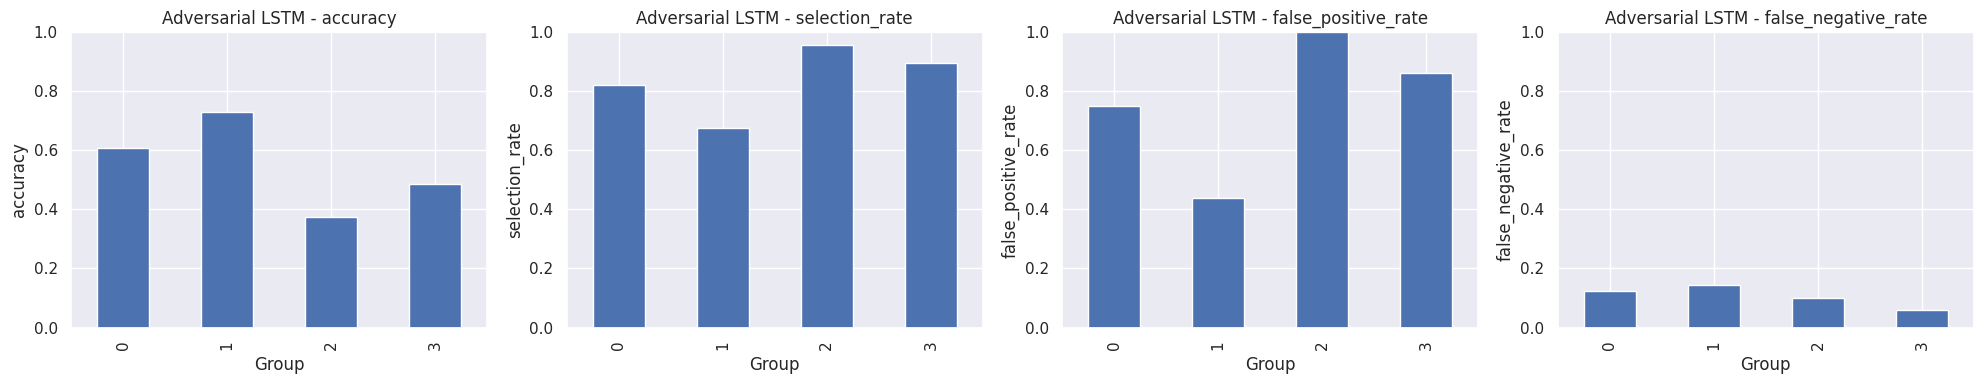

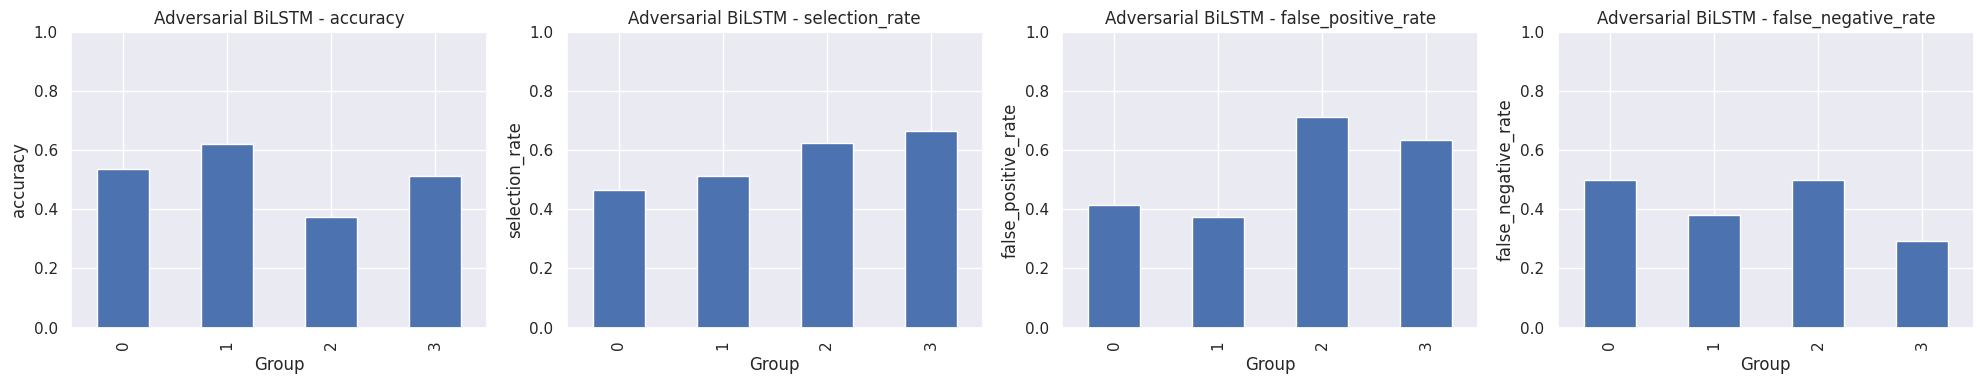

In [119]:
import matplotlib.pyplot as plt

# Function to plot MetricFrame group-wise metrics
def plot_fairness_metrics(metric_frame, model_name):
    metrics = ['accuracy', 'selection_rate', 'false_positive_rate', 'false_negative_rate']
    fig, axs = plt.subplots(1, len(metrics), figsize=(20, 4))

    for i, metric in enumerate(metrics):
        metric_frame.by_group[metric].plot(kind='bar', ax=axs[i])
        axs[i].set_title(f"{model_name} - {metric}")
        axs[i].set_ylabel(metric)
        axs[i].set_xlabel("Group")
        axs[i].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Plot LSTM
plot_fairness_metrics(metric_frame_lstm, "Adversarial LSTM")

# Plot BiLSTM
plot_fairness_metrics(metric_frame_bilstm, "Adversarial BiLSTM")


## Equalized Odds

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def equalized_odds(df, pred_col):
    groups = df["group"].unique()
    labels = df["Lable"].unique()  # use string labels for clarity
    results = []

    for group in groups:
        subset = df[df["group"] == group]
        y_true = subset["Lable"]
        y_pred = subset[pred_col]

        for label in labels:
            # Binarize for the current label: 1 = label, 0 = others
            y_true_bin = (y_true == label).astype(int)
            y_pred_bin = (y_pred == label).astype(int)

            tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin).ravel()

            tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
            fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan

            results.append({
                "group": group,
                "label": label,
                "TPR": tpr,
                "FPR": fpr,
                "model": pred_col
            })

    return pd.DataFrame(results)


In [ ]:
eo_lstm = equalized_odds(balanced_df, "pred_lstm")
eo_bilstm = equalized_odds(balanced_df, "pred_bilstm")

eo_df = pd.concat([eo_lstm, eo_bilstm])


When prioritizing overall accuracy and minimizing missed positives (false negatives), the Adversarial LSTM demonstrates stronger performance but exhibits larger fairness gaps in false positive rates and accuracy across groups.

Conversely, when the focus is on reducing disparities and enhancing fairness among groups, the Adversarial BiLSTM offers a more balanced approach, trading off some accuracy for increased fairness and experiencing a higher false negative rate.
